# decision Tree Classfication


In [178]:
import pandas as pd

In [179]:
df=pd.read_csv("tennis.csv")
del df['temp']
df

,day,outlook,humidity,wind,play
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,Overcast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,Overcast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes
9,D10,Rain,Normal,Weak,Yes


In [180]:
# since machine learning algo does not able to understand the strings we have to convert it into a numerical values
from sklearn.preprocessing import LabelEncoder

In [181]:
#creating object for the label encoder
outlook = LabelEncoder()
humidity=LabelEncoder()
wind=LabelEncoder()
play=LabelEncoder()

In [182]:
df['outlook']= outlook.fit_transform(df['outlook'])
df['humidity']= humidity.fit_transform(df['humidity'])
df['wind'] = wind.fit_transform(df['wind'])
df['play']= play.fit_transform(df['play'])

In [183]:
df

,day,outlook,humidity,wind,play
0,D1,2,0,1,0
1,D2,2,0,0,0
2,D3,0,0,1,1
3,D4,1,0,1,1
4,D5,1,1,1,1
5,D6,1,1,0,0
6,D7,0,1,0,1
7,D8,2,0,1,0
8,D9,2,1,1,1
9,D10,1,1,1,1


In [199]:
# outlook , humididty and the wind are the independent variable and the play is the dependent variable
features_col= ['outlook','humidity','wind']
x= df[features_col]
y = df.play
x

,outlook,humidity,wind
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,0
7,2,0,1
8,2,1,1
9,1,1,1


# splitting data into train and test data

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train

,outlook,humidity,wind
0,2,0,1
5,1,1,0
3,1,0,1
11,0,0,0
6,0,1,0
8,2,1,1
12,0,1,1
2,0,0,1
13,1,0,0
7,2,0,1


# 'gini'
 gini impurity is more efficient in terms of the computing power compartively to entropy

 we can use gini to select the best features

In [187]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')

In [188]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [189]:
classifier.predict(x_test)

array([0, 0, 1])

In [200]:
x_test

,outlook,humidity,wind
1,2,0,0
10,2,1,0
4,1,1,1


In [191]:
classifier.score(x_test,y_test)

0.6666666666666666

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.3, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

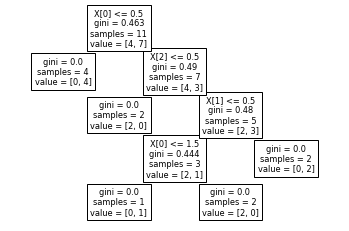

In [192]:
from sklearn import tree
tree.plot_tree(classifier)

# 'entropy'


In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [195]:
classifier.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy')

In [196]:
classifier.predict(x_test)

array([0, 1, 1])

In [197]:
classifier.score(x_test,y_test)

1.0

[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

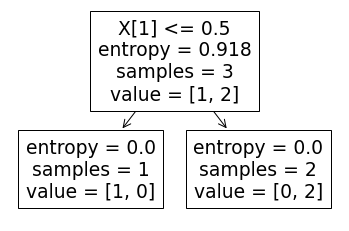

In [198]:
from sklearn import tree
tree.plot_tree(classifier)